# 다중선형회귀분석을 사용한 세종시 전세 예측 모델

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets


In [ ]:
import statsmodels.api as sm

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,032 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmsy10',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'STIXSizeFourSym',
 'STIXGeneral',
 'STIXSizeFiveSym',
 'DejaVu Sans',
 'cmb10',
 'cmmi10',
 'STIXNonUnicode',
 'DejaVu Sans Display',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'STIXSizeOneSym',
 'cmr10',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'cmtt10',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'cmex10',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'cmss10',
 'DejaVu Sans',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'NanumSquareRound',
 'NanumMyeongjo',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'Liberation Sans',
 'Liberation Serif',
 'Liberation Mono',
 'Humor Sans',
 'Liberation Serif',
 'Liberation Mono',
 'Liberation Mono',
 'Liberation Sans Narrow',
 'Liberation Sans Narrow

In [ ]:
from pandas import DataFrame as df

data = pd.read_excel("/content/2020new (2).xlsx")

apt_df = pd.DataFrame(data)


In [ ]:
apt_df

,세부주소,단지명,정부청사거리,층,계약년월,건축년도,주택매매가격지수,COFIX,금리,부동산심리지수,전입인구,소비자물가지수,교육시설,아파트전세가격지수,국고채,SNS긍정률,전용면적,도시형생활주택,보증금
0,세종특별자치시 고운동 가-,가락마을 19단지,3.812090,5,202001,2019,103.1,1.78,1.47,134.5,7787,105.79,3,105.5,1.303,0.553994,84.6972,0,24000
1,세종특별자치시 고운동가-,가락마을 19단지,3.812090,2,202001,2019,103.1,1.78,1.47,134.5,7787,105.79,3,105.5,1.303,0.553994,84.9544,0,21000
2,세종특별자치시 고운동가-,가락마을 19단지,3.812090,10,202001,2019,103.1,1.78,1.47,134.5,7787,105.79,3,105.5,1.303,0.553994,59.6506,0,15000
3,세종특별자치시 고운동가-,가락마을 19단지,3.812090,7,202001,2019,103.1,1.78,1.47,134.5,7787,105.79,3,105.5,1.303,0.553994,105.7788,0,18000
4,세종특별자치시 고운동가-,가락마을 19단지,3.812090,11,202001,2019,103.1,1.78,1.47,134.5,7787,105.79,3,105.5,1.303,0.553994,105.6138,0,23000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11615,세종특별자치시 한솔동 978,첫마을7단지(래미안),3.243743,20,201912,2012,101.3,1.81,1.53,120.1,7248,105.12,6,101.9,1.360,0.458615,101.4500,0,19000
11616,세종특별자치시 한솔동 978,첫마을7단지(래미안),3.243743,25,201912,2012,101.3,1.81,1.53,120.1,7248,105.12,6,101.9,1.360,0.458615,84.8100,0,17000
11617,세종특별자치시 한솔동 978,첫마을7단지(래미안),3.243743,8,201912,2012,101.3,1.81,1.53,120.1,7248,105.12,6,101.9,1.360,0.458615,114.8400,0,21000
11618,세종특별자치시 한솔동 978,첫마을7단지(래미안),3.243743,16,201912,2012,101.3,1.81,1.53,120.1,7248,105.12,6,101.9,1.360,0.458615,114.6100,0,25000


In [ ]:
apt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11620 entries, 0 to 11619
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   세부주소       11620 non-null  object 
 1   단지명        11620 non-null  object 
 2   정부청사거리     11620 non-null  float64
 3   층          11620 non-null  int64  
 4   계약년월       11620 non-null  int64  
 5   건축년도       11620 non-null  int64  
 6   주택매매가격지수   11620 non-null  float64
 7   COFIX      11620 non-null  float64
 8   금리         11620 non-null  float64
 9   부동산심리지수    11620 non-null  float64
 10  전입인구       11620 non-null  int64  
 11  소비자물가지수    11620 non-null  float64
 12  교육시설       11620 non-null  int64  
 13  아파트전세가격지수  11620 non-null  float64
 14  국고채        11620 non-null  float64
 15  SNS긍정률     11620 non-null  float64
 16  전용면적       11620 non-null  float64
 17  도시형생활주택    11620 non-null  int64  
 18  보증금        11620 non-null  int64  
dtypes: float64(10), int64(7), object(2)
memory usa

In [ ]:
# 아파트 거래금액(가격) 포함한 dataframe의 상관계수.
cols = ['층', '계약년월', '건축년도', '정부청사거리', '주택매매가격지수','전입인구', 'COFIX',
       '금리', '부동산심리지수','SNS긍정률', '국고채', '전용면적', '보증금']

In [ ]:
apt_df[cols]

,층,계약년월,건축년도,정부청사거리,주택매매가격지수,전입인구,COFIX,금리,부동산심리지수,SNS긍정률,국고채,전용면적,보증금
0,5,202001,2019,3.812090,103.1,7787,1.78,1.47,134.5,0.553994,1.303,84.6972,24000
1,2,202001,2019,3.812090,103.1,7787,1.78,1.47,134.5,0.553994,1.303,84.9544,21000
2,10,202001,2019,3.812090,103.1,7787,1.78,1.47,134.5,0.553994,1.303,59.6506,15000
3,7,202001,2019,3.812090,103.1,7787,1.78,1.47,134.5,0.553994,1.303,105.7788,18000
4,11,202001,2019,3.812090,103.1,7787,1.78,1.47,134.5,0.553994,1.303,105.6138,23000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11615,20,201912,2012,3.243743,101.3,7248,1.81,1.53,120.1,0.458615,1.360,101.4500,19000
11616,25,201912,2012,3.243743,101.3,7248,1.81,1.53,120.1,0.458615,1.360,84.8100,17000
11617,8,201912,2012,3.243743,101.3,7248,1.81,1.53,120.1,0.458615,1.360,114.8400,21000
11618,16,201912,2012,3.243743,101.3,7248,1.81,1.53,120.1,0.458615,1.360,114.6100,25000


In [ ]:
apt_df[cols].corr()

,층,계약년월,건축년도,정부청사거리,주택매매가격지수,전입인구,COFIX,금리,부동산심리지수,SNS긍정률,국고채,전용면적,보증금
층,1.000000,-0.007864,0.102700,-0.130818,-0.009882,0.018812,0.009732,0.012600,-0.006550,-0.002386,0.016731,0.156936,0.187239
계약년월,-0.007864,1.000000,-0.022024,0.004346,0.359892,-0.247920,-0.867453,-0.803897,0.784746,0.396461,-0.801346,-0.002241,0.262477
건축년도,0.102700,-0.022024,1.000000,-0.611061,-0.018169,0.013872,0.030991,0.028582,-0.021476,-0.055443,0.014502,0.131157,0.390538
정부청사거리,-0.130818,0.004346,-0.611061,1.000000,-0.001633,-0.033804,-0.008488,-0.017844,-0.005475,0.021041,-0.009931,0.008727,-0.351917
주택매매가격지수,-0.009882,0.359892,-0.018169,-0.001633,1.000000,0.099593,-0.433588,-0.411119,0.408665,0.281619,-0.361463,-0.007527,0.148936
전입인구,0.018812,-0.247920,0.013872,-0.033804,0.099593,1.000000,0.381448,0.519732,-0.100115,-0.216459,0.485888,-0.002170,-0.035924
COFIX,0.009732,-0.867453,0.030991,-0.008488,-0.433588,0.381448,1.000000,0.954546,-0.864034,-0.552444,0.876334,-0.001306,-0.281258
금리,0.012600,-0.803897,0.028582,-0.017844,-0.411119,0.519732,0.954546,1.000000,-0.815243,-0.523786,0.940451,-0.002940,-0.237825
부동산심리지수,-0.006550,0.784746,-0.021476,-0.005475,0.408665,-0.100115,-0.864034,-0.815243,1.000000,0.574041,-0.809572,0.007743,0.235207
SNS긍정률,-0.002386,0.396461,-0.055443,0.021041,0.281619,-0.216459,-0.552444,-0.523786,0.574041,1.000000,-0.428508,0.001129,0.153801


In [ ]:
# 독립변수들만 넣어 만든 dataframe (가격 변수 x).
x_data = apt_df[['층', '정부청사거리', '전입인구','COFIX',
       'SNS긍정률', '전용면적', '도시형생활주택']]
x_data.head()

,층,정부청사거리,전입인구,COFIX,SNS긍정률,전용면적,도시형생활주택
0,5,3.81209,7787,1.78,0.553994,84.6972,0
1,2,3.81209,7787,1.78,0.553994,84.9544,0
2,10,3.81209,7787,1.78,0.553994,59.6506,0
3,7,3.81209,7787,1.78,0.553994,105.7788,0
4,11,3.81209,7787,1.78,0.553994,105.6138,0


In [ ]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11620 entries, 0 to 11619
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   층        11620 non-null  int64  
 1   정부청사거리   11620 non-null  float64
 2   전입인구     11620 non-null  int64  
 3   COFIX    11620 non-null  float64
 4   SNS긍정률   11620 non-null  float64
 5   전용면적     11620 non-null  float64
 6   도시형생활주택  11620 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 635.6 KB


## 상관계수/산점도를 통해 다중공선성 확인



In [ ]:
# 상관계수/산점도를 통해 다중공선성 확인.
x_data.corr()

,층,정부청사거리,전입인구,COFIX,SNS긍정률,전용면적,도시형생활주택
층,1.000000,-0.130818,0.018812,0.009732,-0.002386,0.156936,-0.120772
정부청사거리,-0.130818,1.000000,-0.033804,-0.008488,0.021041,0.008727,-0.021771
전입인구,0.018812,-0.033804,1.000000,0.381448,-0.216459,-0.002170,-0.031527
COFIX,0.009732,-0.008488,0.381448,1.000000,-0.552444,-0.001306,-0.081150
SNS긍정률,-0.002386,0.021041,-0.216459,-0.552444,1.000000,0.001129,0.023900
전용면적,0.156936,0.008727,-0.002170,-0.001306,0.001129,1.000000,-0.405489
도시형생활주택,-0.120772,-0.021771,-0.031527,-0.081150,0.023900,-0.405489,1.000000


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


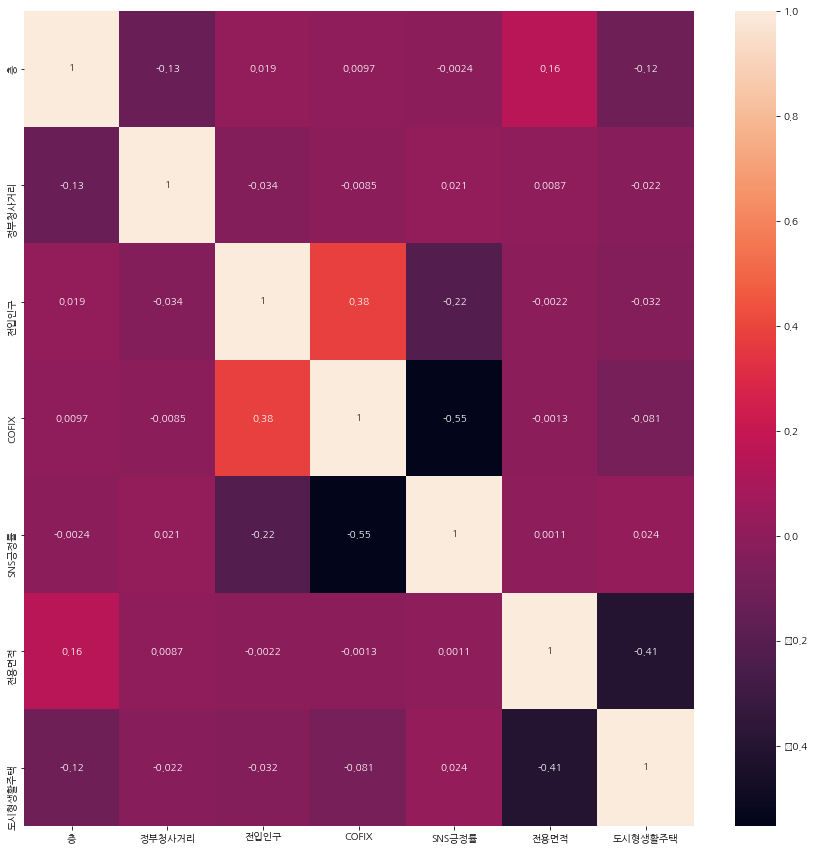

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))
plt.rc('font', family='NanumGothic')
sns.heatmap(x_data.corr(), annot=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


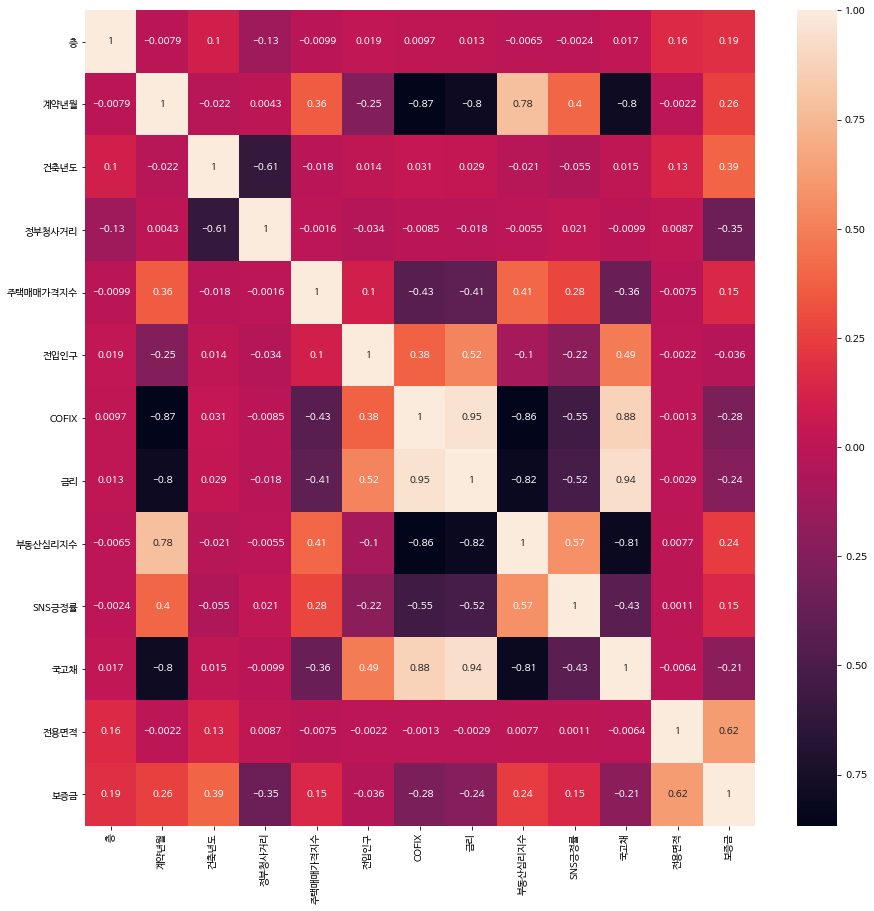

In [ ]:
plt.figure(figsize=(15, 15))
plt.rc('font', family='NanumBarunGothic')
sns.heatmap(apt_df[cols].corr(), annot=True)
plt.show()

<Figure size 72x72 with 0 Axes>

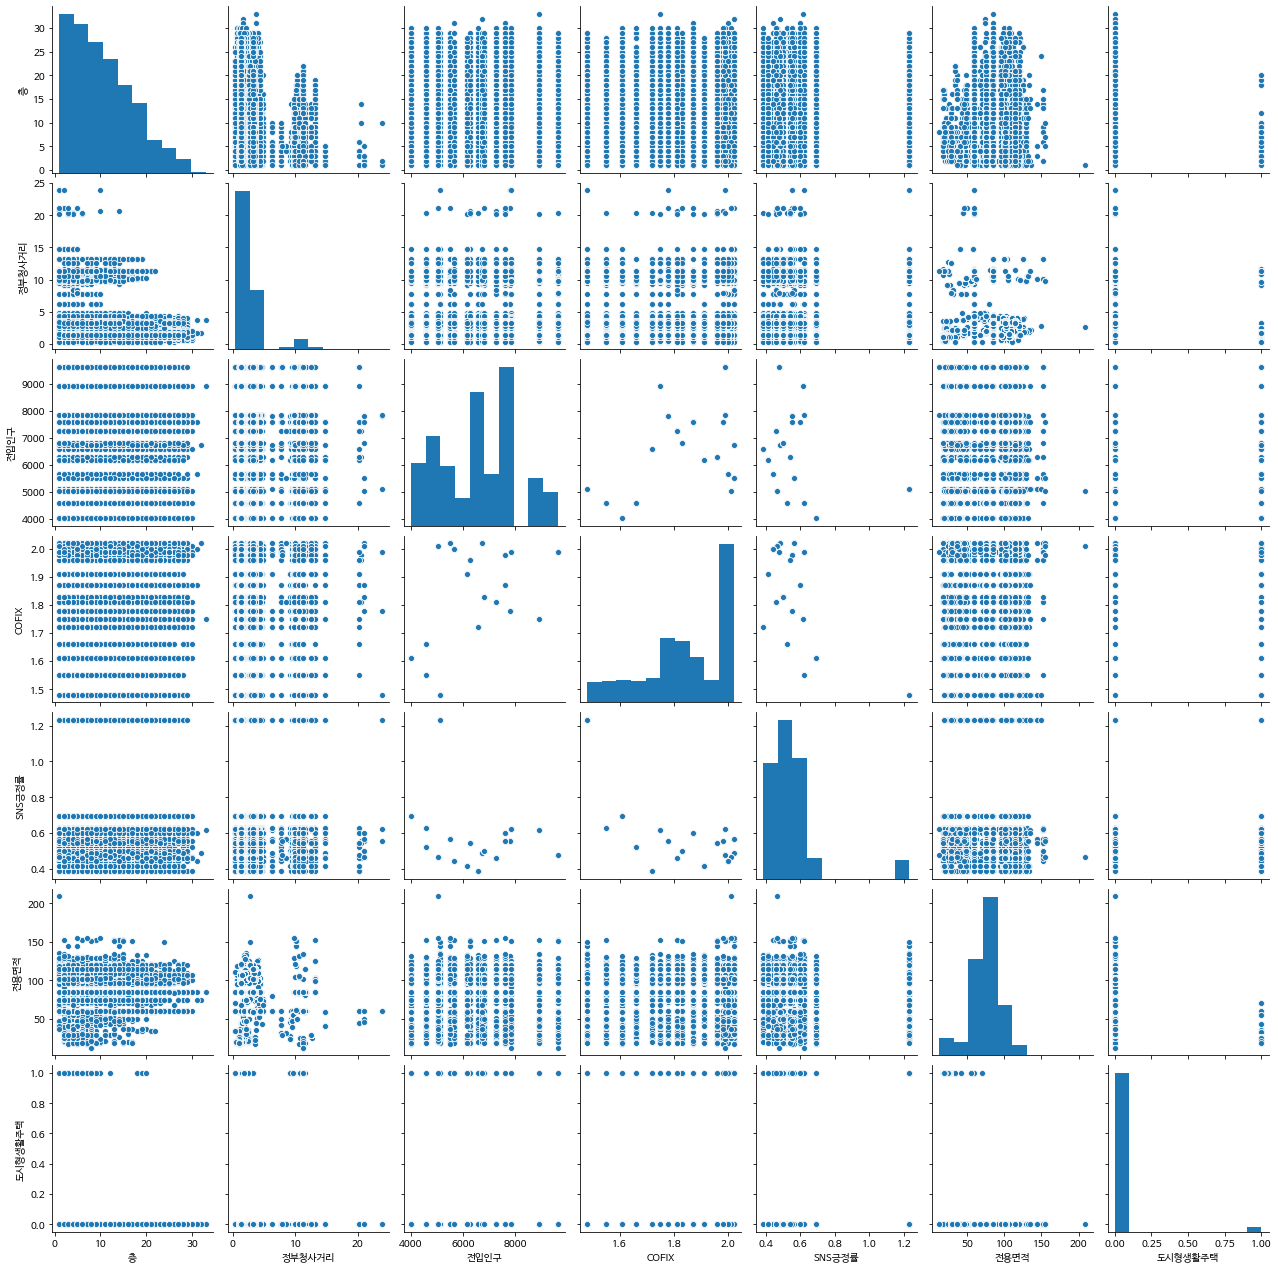

<Figure size 72x72 with 0 Axes>

In [ ]:
sns.pairplot(x_data)
plt.figure(figsize=(1,1))

In [ ]:
# target 변수 (종속 변수)
price = apt_df[["보증금"]]

In [ ]:
# x_data1 = 독립 변수. -> x_data에 target 변수를 넣어 x_data1 생성
x_data1 = sm.add_constant(x_data, has_constant='add')

In [ ]:
# 독립 변수에 price를 넣고 다중회귀모형을 만듬.
multi_model = sm.OLS.from_formula("보증금 ~  C(도시형생활주택) + 층 + 건축년도 + COFIX + SNS긍정률 + 정부청사거리 + 전용면적 ", data=apt_df)
fitted_multi_model = multi_model.fit()

In [ ]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    보증금   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     2683.
Date:                Fri, 11 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:48:05   Log-Likelihood:            -1.1140e+05
No. Observations:               11620   AIC:                         2.228e+05
Df Residuals:                   11612   BIC:                         2.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -4.187e+05   1.96e+04    -21.312      0.000   -4.57e+05    -3.8e+05
C(도시형생활주택)[T.1] -2255.2874    216.881    -10.399      0.000   -2680.412   -1830.163
층                  36.9836      5.127      7.213      0.000      26.933      47.034
건축년도              220.7790      9.745     22.655      0.000     201.676     239.882
COFIX           -1.036e+04    248.779    -41.661      0.000   -1.09e+04   -9876.691
SNS긍정률            365.9972    241.987      1.512      0.130    -108.339     840.333
정부청사거리           -584.3769     16.946    -34.485      0.000    -617.593    -551.161
전용면적              153.3921      1.735     88.425      0.000     149.992     156.792
==============================================================================
Omnibus:                     1266.233   Durbin-Watson:                   1.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11015.074
Skew:                           0.134   Prob(JB):                         0.00
Kurtosis:                       7.762   Cond. No.                     1.21e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###Dep.Variable, R-squard, Adj.R-squard, 
y의 변동성을 설명하는 정도가 67% 정도 된다는 의미이다.

###Prob(F-statistic),
이것은 F 통계량이며 0에 가까울수록 사용할 수 있는(신뢰성 있는) 모델이다. 

###AIC, BIC,
값이 작을수록 좋다.

###회귀계수표,
P 밸류가 0에 가까운 낮은 값이면 설명력 있다 판단한다. 

이 표에서 cofix, 금리는 다른 변수들과 상대적으로 p-value가 큰 수가 나와 유의미한 영향을 미치지 못한다 볼 수 있다. 




In [ ]:
# 회귀계수
print(fitted_multi_model.params)

Intercept         -418685.495010
C(도시형생활주택)[T.1]     -2255.287434
층                      36.983636
건축년도                  220.779017
COFIX              -10364.339246
SNS긍정률                365.997177
정부청사거리               -584.376861
전용면적                  153.392056
dtype: float64


## VIF를 통한 다중공선성 확인. (예측 모델의 정확성 확인)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif

,VIF Factor,features
0,3.732762,층
1,2.389825,정부청사거리
2,25.191912,전입인구
3,44.949092,COFIX
4,9.896061,SNS긍정률
5,15.909510,전용면적
6,1.204905,도시형생활주택


##다중공선성,
이란 행렬 x의 한 열이 다른 열과 선형 조합의 관계를 맺고 있는 상태.

만약 독립변수들 간에 완전한 상관관계(+1, -1)이 존재한다면 최소제곱추정방법(OLS)의 공식을 사용할 수 없다.

또한, 독립변수들 간에 높은 상관관계가 존재하면 한 독립변수가 종속변수에 대한 설명력이 높더라도 다중공선성이 높으면 설명력이 낮은 것처럼 나타난다.

VIF는 10을 기준으로 판단을 한다.
10보다 작아야 한다.

10보다 큰 변수는 제거한다.

In [ ]:
# x_data2 = 계약년월 삭제한 데이터
vif = pd.DataFrame()
x_data2 = x_data.drop('전입인구', axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif["features"] = x_data2.columns

vif

,VIF Factor,features
0,3.732088,층
1,2.387661,정부청사거리
2,20.708629,COFIX
3,9.895959,SNS긍정률
4,15.909507,전용면적
5,1.204904,도시형생활주택


In [ ]:
x_data3 = sm.add_constant(x_data2, has_constant='add')
model_vif = sm.OLS.from_formula("보증금 ~  C(도시형생활주택) + 층 + COFIX + SNS긍정률 + 정부청사거리 + 전용면적 ", data=apt_df)
fitted_model_vif = model_vif.fit()
fitted_model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    보증금   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     2916.
Date:                Fri, 11 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:48:11   Log-Likelihood:            -1.1165e+05
No. Observations:               11620   AIC:                         2.233e+05
Df Residuals:                   11613   BIC:                         2.234e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.619e+04    580.147     45.136      0.000     2.5e+04    2.73e+04
C(도시형생활주택)[T.1] -1823.5108    220.756     -8.260      0.000   -2256.229   -1390.792
층                  37.8364      5.239      7.222      0.000      27.567      48.106
COFIX            -1.03e+04    254.189    -40.519      0.000   -1.08e+04   -9801.348
SNS긍정률            138.4601    247.054      0.560      0.575    -345.807     622.727
정부청사거리           -820.0943     13.667    -60.006      0.000    -846.884    -793.305
전용면적              160.8876      1.740     92.463      0.000     157.477     164.298
==============================================================================
Omnibus:                     1135.014   Durbin-Watson:                   1.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8749.448
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       7.248   Cond. No.                     1.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

정확도가 같게 나온다.





/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


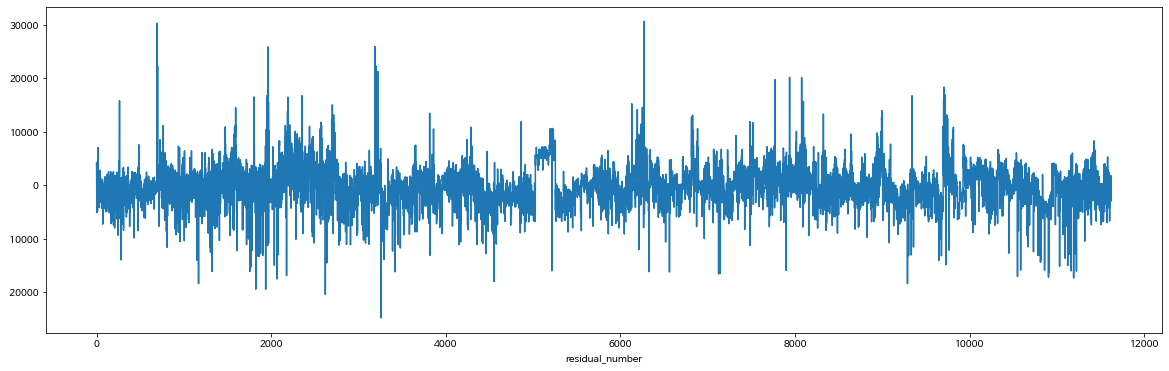

In [ ]:
# 시각화
# 다중 회귀모델의 잔차
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
fitted_multi_model.resid.plot()
plt.xlabel("residual_number")
plt.show()

잔차: 표본집단에서 회귀식을 얻었다면, 그 회귀식을 통해 얻은 예측값과 실제 관측값의 차이


## 학습/검증데이터 분할

In [ ]:
# 원본 데이터의 검증.
# 회귀 모델 성능 확인.
from sklearn.model_selection import train_test_split

X = x_data
y = price
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.7, test_size = 0.3,
                                                    random_state = 102)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8133, 7) (3486, 7) (8133, 1) (3486, 1)


## x = (3302, 11) (1416, 11)

총 데이터의 70%가 3996개의 학습데이터로 분류되었고 데이터의 나머지 30%가 검증데이터로 분류되었다.

7은 층, 계약년월, 건축년도, 정부 청사와의 거리(km), cd 금리, 부동산 심리지수, 아파트 실거래가 지수, sns 긍정률, 소비자 물가지수, 저축성 수신금리, 코스피 지수와 같은 변수의 개수다.

## y = (3302, 1) (1416, 1)

1은 거래금액(만원)/전용면적(㎡)인 타겟 변수이다. 


In [ ]:
x_train2 = sm.add_constant(x_train, has_constant='add')
fit_1 = sm.OLS(y_train, x_train2)
fit_1 = fit_1.fit()

In [ ]:
x_test2 = sm.add_constant(x_test, has_constant='add')
fit_1.predict(x_test2)

11395    17724.959207
5315     16342.792328
8543     13366.831844
6364     18444.707127
3745     21539.154607
             ...     
4066     18587.493382
10883    17277.762893
2373     16297.396375
4431     11739.809216
5351     17083.816790
Length: 3486, dtype: float64

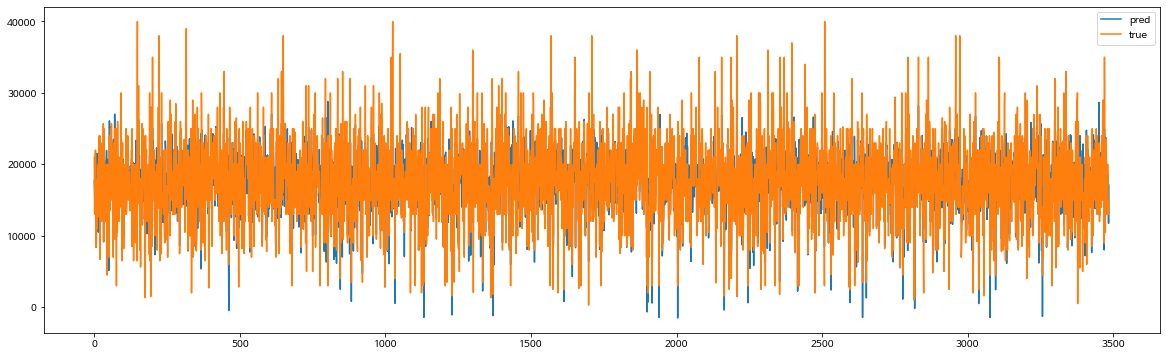

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(np.array(fit_1.predict(x_test2)), label="pred")
plt.plot(np.array(y_test), label = "true")
plt.legend()
plt.show()

In [ ]:
apt = pd.read_excel("/content/2020new_보증금 x.xlsx")
X_final = pd.DataFrame(apt)

In [ ]:
x_final = apt[['층', '정부청사거리','COFIX',
       'SNS긍정률', '전용면적', '도시형생활주택']]

In [ ]:
# 전입인구을 제거한 데이터의 검증

X = x_data2
y = price
x2_train, x2_test, y2_train, y2_test = train_test_split(X, y, 
                                                    train_size = 0.7, test_size = 0.3,
                                                    random_state = 102)
print(x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape)


(8133, 6) (3486, 6) (8133, 1) (3486, 1)


In [ ]:
x2_train2 = sm.add_constant(x2_train, has_constant='add')
fit_2 = sm.OLS(y2_train, x2_train2)
fit_2 = fit_2.fit()

In [ ]:
# x_final 데이터.
x2_test2 = sm.add_constant(x_final, has_constant='add')
fit_2.predict(x2_test2)

0      16402.004431
1      23143.767891
2      17971.766176
3      22548.952012
4      19290.847787
           ...     
177     2520.471273
178     4893.313740
179    11540.903703
180     9017.217909
181    10094.974107
Length: 182, dtype: float64

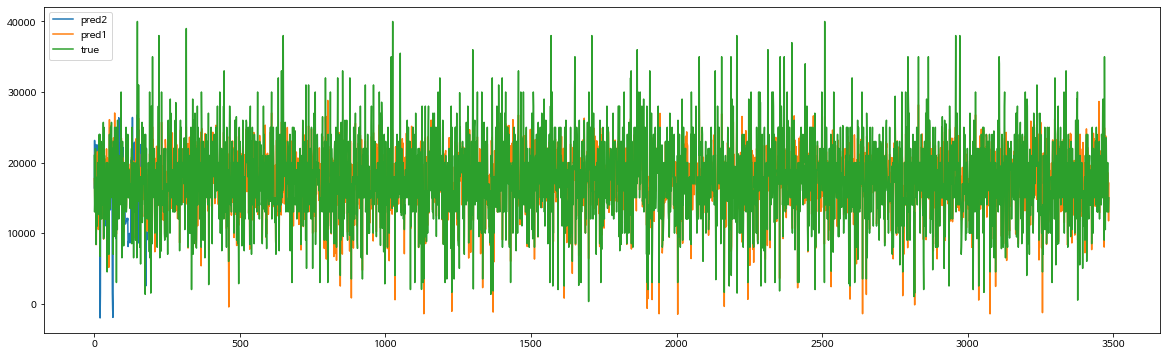

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(np.array(fit_2.predict(x2_test2)), label="pred2")
plt.plot(np.array(fit_1.predict(x_test2)), label="pred1")
plt.plot(np.array(y2_test), label = "true")
plt.legend()
plt.show()

## MSE를 통한 test data(검증데이터)에 대한 성능 비교.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# 원본 test data
mean_squared_error(y_true = y_test['보증금'], y_pred=fit_1.predict(x_test2))

12644192.601211473

In [ ]:
# 전입인구 제거 test data
mean_squared_error(y_true=y2_test['보증금'], y_pred = fit_2.predict(x2_test2))

ValueError: ignored

MSE는 낮을수록 성능이 좋은 것이다. 


In [ ]:
# 예측 집값
fit_1.predict(x_test2)

11395    17724.959207
5315     16342.792328
8543     13366.831844
6364     18444.707127
3745     21539.154607
             ...     
4066     18587.493382
10883    17277.762893
2373     16297.396375
4431     11739.809216
5351     17083.816790
Length: 3486, dtype: float64

In [ ]:
fit_2.predict(x2_test2)

0      16402.004431
1      23143.767891
2      17971.766176
3      22548.952012
4      19290.847787
           ...     
177     2520.471273
178     4893.313740
179    11540.903703
180     9017.217909
181    10094.974107
Length: 182, dtype: float64

In [ ]:
final = fit_2.predict(x2_test2)

In [ ]:
final.to_excel('final_predict.xlsx')

In [ ]:
final